**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: MR4010.10 - Navegación Auronoma**

Tecnológico de Monterrey

Prof David Antonio Torres

**Semana 7**
Actividad 4.2 - Detección de Señales de Tránsito

---

*   NOMBRE: Henry José Requena Molina
*   MATRÍCULA: A01795933

*   NOMBRE: Ariel Mora Monroy
*   MATRÍCULA: A01795561

*   NOMBRE: Abel Jhoan Díaz Escalera
*   MATRÍCULA: A00566706

*   NOMBRE: Jose Antonio Toledo Gonzalez
*   MATRÍCULA: A01796592

In [1]:
# Librerias a usar
import cv2
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, SpatialDropout2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import glob
%matplotlib inline


In [2]:
import kagglehub
import os

# Descargamos la ultima version de dataset
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

# Ennumeramos todos las entradas en listas
all_entries = os.listdir(path)

# Filtramos los folder que existen
subfolders = [entry for entry in all_entries if os.path.isdir(os.path.join(path, entry))]

# Imprimimos los folder existentes
print("Subfolders found:", subfolders)

subfolders_Train = ['Train']
images = []
labels = []
fixed_size = (32, 32)

# Datos de entrada para entrenar el modelo
# Lectura de los folders y archivos
for i, subfolder in enumerate(subfolders_Train):
    subfolder_path = os.path.join(path, subfolder)
    for subfolder1 in os.listdir(subfolder_path):
        subfolderPath = os.path.join(subfolder_path, subfolder1)
        folderName = os.path.basename(subfolderPath)
        for filename in os.listdir(subfolderPath):
            filepath = os.path.join(subfolderPath, filename)
            # Lectura de las imagenes en formato .png, .jpg y .jpeg
            if filepath.endswith('.png') or filepath.endswith('.jpg') or filepath.endswith('.jpeg'):
                try:
                    # Lectura de las imagenes y preprocesamiento
                    img = mpimg.imread(filepath)
                    # Cambio de tamaño de las imagenes a 32x32
                    img_resized = cv2.resize(img, fixed_size)
                    # Cambio de color de la imagen de 3 canales a 1
                    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
                    # Aplicacion de una convolucion Blur
                    img_blur = cv2.GaussianBlur(img_gray, (3, 3), sigmaX=0, sigmaY=0)
                    if img is not None:
                      # Almacenamiento de las imagenes y sus labels respectivos
                      images.append(img_blur)
                      labels.append(folderName)  # Uso del indice como label
                except Exception as e:
                    print(f"Error reading image {filepath}: {e}")

print(f"Read {len(images)} images with {len(labels)} labels.")


Subfolders found: ['Meta', 'meta', 'Test', 'test', 'Train', 'train']
Read 39209 images with 39209 labels.


In [3]:
subfolders_Test = ['Test']
images_test = []
labels_test = []

# Datos de prueba para el modelo
# Lectura de los folders y archivos
for i, subfolder in enumerate(subfolders_Test):
    subfolder_path = os.path.join(path, subfolder)
    for filename in os.listdir(subfolder_path):
        filepath = os.path.join(subfolder_path, filename)
        # Lectura de las imagenes en formato .png, .jpg y .jpeg
        if filepath.endswith('.png') or filepath.endswith('.jpg') or filepath.endswith('.jpeg'):
            try:
              # Lectura de las imagenes y preprocesamiento
              img = mpimg.imread(filepath)
              # Cambio de tamaño de las imagenes a 32x32
              img_resized = cv2.resize(img, fixed_size)
              # Cambio de color de la imagen de 3 canales a 1
              img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
              # Aplicacion de una convolucion Blur
              img_blur = cv2.GaussianBlur(img_gray, (3, 3), sigmaX=0, sigmaY=0)
              if img is not None:
                images_test.append(img_blur)
                # labels_test.append(filename)
            except Exception as e:
              print(f"Error reading image {filepath}: {e}")

print(f"Read {len(images_test)} images with {len(labels_test)} labels.")


Read 12630 images with 0 labels.


(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


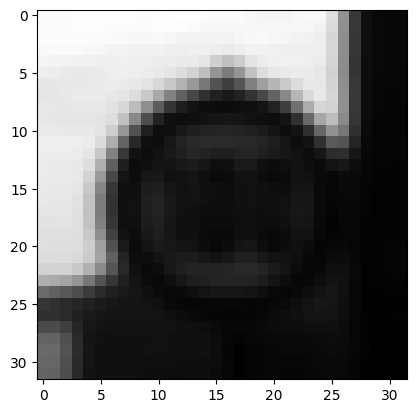

In [4]:
# Corroborando que todas las imagenes tengan el mismo formato.
print(images[100].shape)
print(images[1000].shape)
print(images[10000].shape)
print(images[20000].shape)
print(images[30000].shape)

plt.imshow(images[100], cmap='gray')
plt.show()

(32, 32)
(32, 32)
(32, 32)


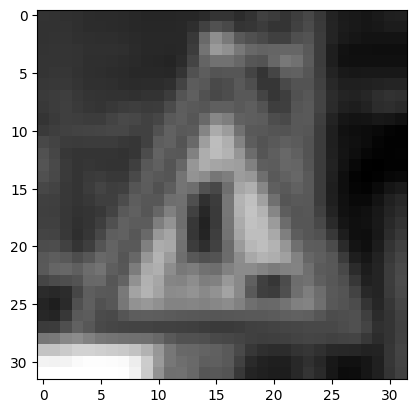

In [5]:
# Corroborando el formato del dataset test.
print(images_test[100].shape)
print(images_test[1000].shape)
print(images_test[10000].shape)
# print(images_test[20000].shape)
# print(images_test[30000].shape)

plt.imshow(images_test[100], cmap='gray')
plt.show()


In [6]:
# Convertir las listas a Numphy array y normalizar los dataset entre 0 y 1
images = np.array(images)
images = images.astype('float32')
images = images/255
images = images.reshape(-1, 32, 32, 1)
labels = np.array(labels)
labels = to_categorical(labels, 43)
images_test = np.array(images_test)
images_test = images_test.astype('float32')
images_test = images_test/255
images_test = images_test.reshape(-1, 32, 32, 1)
labels_test = np.array(labels_test)

print("Formato del array de imagenes: ",images.shape)
print("Formato del array de los labels: ", labels.shape)
print("Formato del array de imagenes test: ",images_test.shape)
print("Formato del aaray de los labels test: ", labels_test.shape)
print("\n")

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Formato del array de imagenes de entrenamiento: ",x_train.shape)
print("Formato del array de los labels de entrenamiento: ", y_train.shape)
print("Formato del array de imagenes de prueba: ",x_test.shape)
print("Formato del aaray de los labels de prueba: ", y_test.shape)


Formato del array de imagenes:  (39209, 32, 32, 1)
Formato del array de los labels:  (39209, 43)
Formato del array de imagenes test:  (12630, 32, 32, 1)
Formato del aaray de los labels test:  (0,)


Formato del array de imagenes de entrenamiento:  (31367, 32, 32, 1)
Formato del array de los labels de entrenamiento:  (31367, 43)
Formato del array de imagenes de prueba:  (7842, 32, 32, 1)
Formato del aaray de los labels de prueba:  (7842, 43)


In [7]:
# Declaración de nuestros dos mejores modelos para entrenar e hiperparametros para el modelo

batch_size = 64
num_classes = labels.shape[1]
epochs = 30
augment = False
patience = 5

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=[-5, 0, 5], horizontal_flip=True)

def create_model_bn_5_dropout():

  model = Sequential()
  # Convolutional layers
  model.add(Conv2D(filters=20, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding="same"))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=20, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(SpatialDropout2D(0.25))

  model.add(Conv2D(filters=40, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(Conv2D(filters=40, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(SpatialDropout2D(0.2))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.15))

  # Fully Connected layers
  model.add(Flatten())
  model.add(Dense(units=384, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=192, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=num_classes, activation='softmax'))

  return model

def create_model_bn_6_dropout():

  model = Sequential()
  # Convolutional layers
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding="same"))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding="same"))
  model.add(BatchNormalization())
  model.add(AveragePooling2D())
  model.add(SpatialDropout2D(0.2))

  model.add(Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(AveragePooling2D())
  model.add(SpatialDropout2D(0.2))

  model.add(Conv2D(filters=72, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=72, kernel_size=(3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(AveragePooling2D())
  model.add(Dropout(0.1))

  # Fully Connected layers
  model.add(Flatten())
  model.add(Dense(units=384, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=192, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(units=num_classes, activation='softmax'))

  return model


In [8]:

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=patience, restore_best_weights=True, verbose=1)

# Escoge el modelo a usar
model = create_model_bn_5_dropout()
model.summary()
# Learning rate para nuestro optimizador Adam
opt = Adam(learning_rate=0.0001)

#Compilamos
model.compile(loss=categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
start = time()
if augment:
  it_train = datagen.flow(x_train, y_train, batch_size=batch_size)
  history_object = model.fit(it_train, epochs=epochs, validation_data=(x_test, y_test), shuffle=True, callbacks=[early_stopping])
else:
  history_object = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True, callbacks=[early_stopping])
print("Training time:", time()-start)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 20)     │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 20)     │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 16, 16, 20)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 40)     │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 40)     │        14,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 40)     │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 8, 8, 40)       │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        23,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 384)            │       393,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 192)            │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         8,29

 Total params: 561,927 (2.14 MB)

 Trainable params: 561,639 (2.14 MB)

 Non-trainable params: 288 (1.12 KB)

Epoch 1/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.0541 - loss: 4.0738 - val_accuracy: 0.0690 - val_loss: 3.5966
Epoch 2/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1121 - loss: 3.3561 - val_accuracy: 0.1622 - val_loss: 3.3374
Epoch 3/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2461 - loss: 2.8223 - val_accuracy: 0.3447 - val_loss: 2.3721
Epoch 4/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4376 - loss: 1.9592 - val_accuracy: 0.7173 - val_loss: 0.9724
Epoch 5/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6010 - loss: 1.3117 - val_accuracy: 0.8085 - val_loss: 0.6597
Epoch 6/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7230 - loss: 0.8969 - val_accuracy: 0.9000 - val_loss: 0.3446
Epoch 7/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7950 - loss: 0.6526 - val_accuracy: 0.9408 - val_loss: 0.2141
Epoch 8/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8442 - loss: 0.4977 - val_accuracy: 

246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9950 - loss: 0.0225
Test loss: 0.01835046149790287
Test accuracy: 0.9951543211936951


Text(0.5, 0, 'epoch')

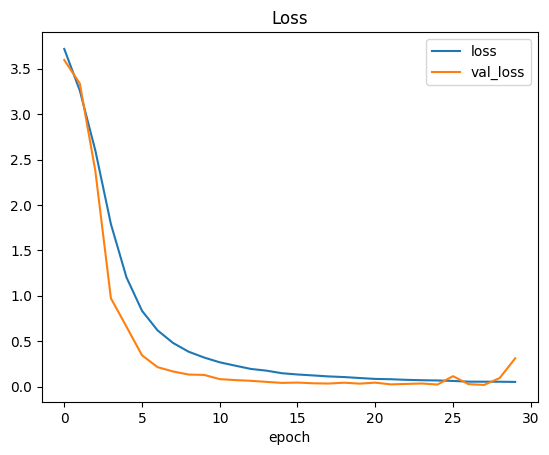

In [9]:
# Realizamos las preubas para calificar nuestro modelo acorde a las perdidas de nuestro dataset de entrenamiento y de test
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

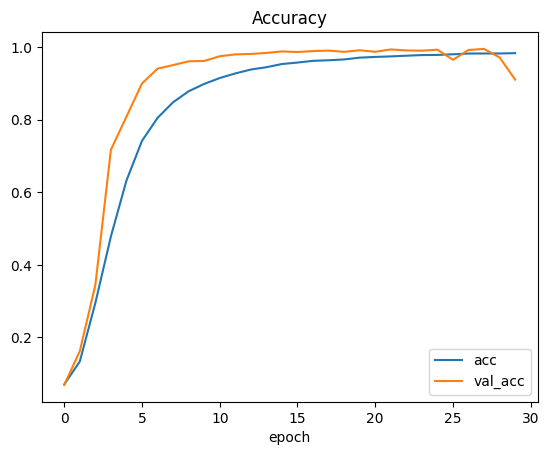

In [10]:
# Realizamos las preubas para calificar nuestro modelo acorde al Accuracy de nuestro dataset de entrenamiento y de test
plt.plot(history_object.history['accuracy'])
plt.plot(history_object.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       1.00      0.99      0.99       444
           2       0.98      0.99      0.99       444
           3       0.99      0.99      0.99       295
           4       1.00      1.00      1.00       396
           5       0.99      0.99      0.99       338
           6       1.00      1.00      1.00        87
           7       0.99      0.99      0.99       324
           8       1.00      1.00      1.00       260
           9       1.00      1.00      1.00       274
          10       1.00      1.00      1.00       417
          11       1.00      1.00      1.00       258
          12       1.00      1.00      1.00       453
          13       1.00      1.00      1.00       431
          14       0.99      1.00      1.00       165
          15       1.00      0.99      0.99       134
          16       1.00      1.00      1

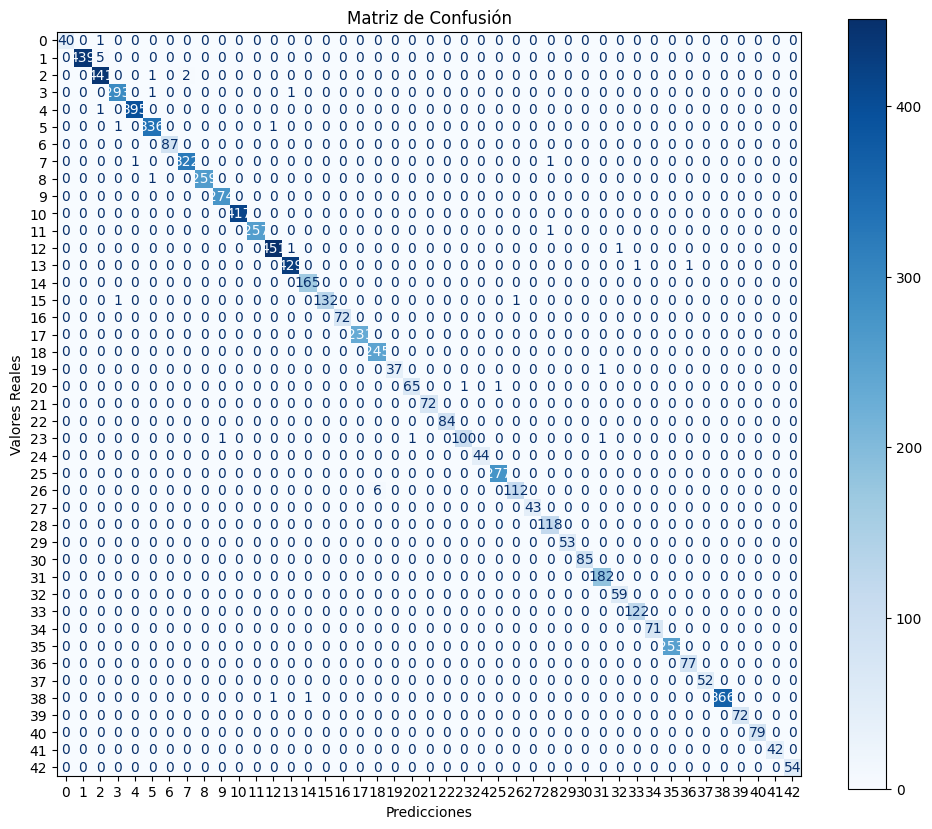

In [11]:
# Graficamos nuestra Matriz de Confusión
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

print(classification_report(y_test_labels, y_predict))
cm = confusion_matrix(y_test_labels, y_predict)

plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_labels))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

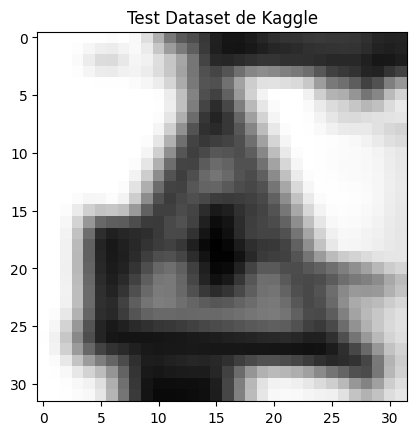

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
Pertenese a la clase:  [11]


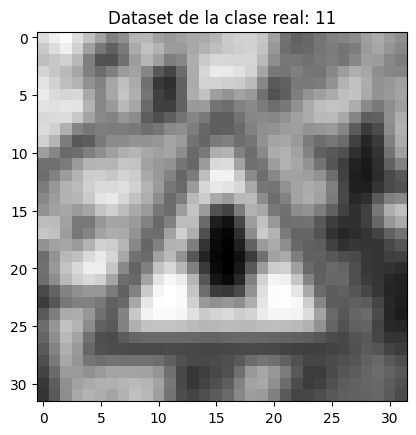

In [12]:
# Realizamos la prueba con el dataset de Test de Kaggle
number = 3000

plt.imshow(images_test[number], cmap='gray')
plt.title(f'Test Dataset de Kaggle')
plt.show()

y_predict_test = model.predict(np.expand_dims(images_test[number], axis=0))
y_predict_test = np.argmax(y_predict_test, axis=1)
print("Pertenese a la clase: ", y_predict_test)

datasetClase = images[labels.argmax(axis=1) == y_predict_test[0]]

plt.imshow(datasetClase[100], cmap='gray')
plt.title(f'Dataset de la clase real: {y_predict_test[0]}')
plt.show()
